## Linear Regression on Boston Housing Dataset

In [89]:
# imports
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

In [47]:
# reading data
raw_data=pd.read_csv("BostonHousing.csv")
copy_data=deepcopy(raw_data)
copy_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

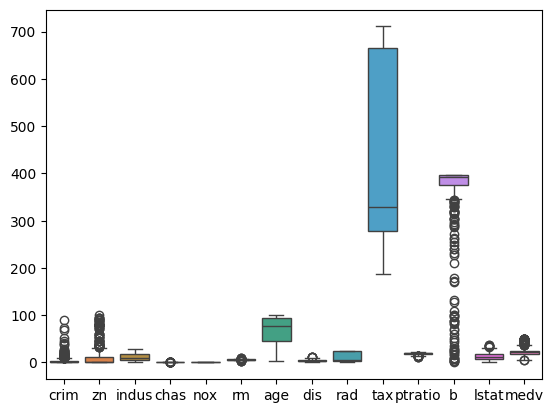

In [48]:
# Checking Outliers with sns
sns.boxplot(data=copy_data)

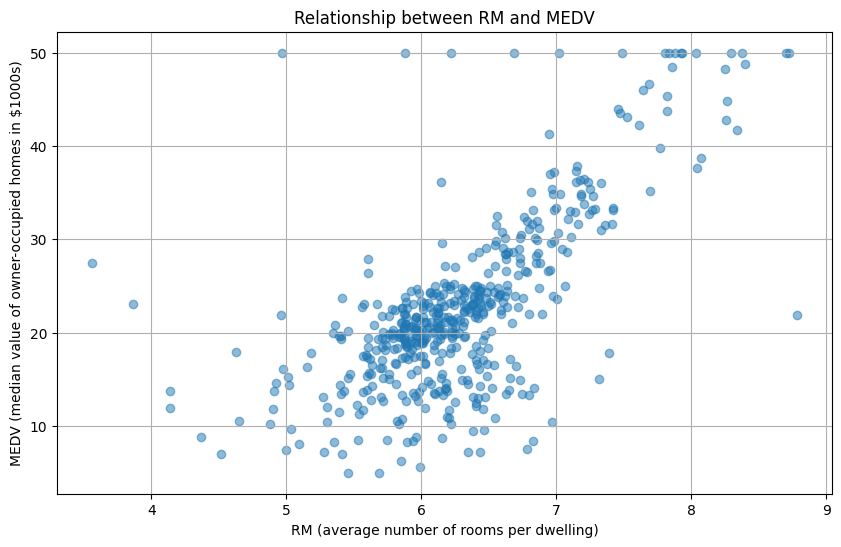

In [49]:
# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(copy_data['rm'], copy_data['medv'], alpha=0.5)
plt.title('Relationship between RM and MEDV')
plt.xlabel('RM (average number of rooms per dwelling)')
plt.ylabel('MEDV (median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

In [50]:
copy_data.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [52]:
copy_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [53]:
copy_data.dropna(inplace=True)
copy_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [54]:
# Renaming Last Column to Price
copy_data.rename(columns={'medv':'Price'}, inplace=True)
copy_data['Price']=copy_data['Price'] # Converting Price to 1000s of dollars
copy_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
# Setting Features (x) and Target (y)
x=copy_data.drop(columns=['Price'])
y=copy_data['Price']
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [56]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression Model
model=LinearRegression()
model.fit(x_train,y_train)
# Prediction
y_pred=model.predict(x_test)
# Model Evaluation
r2=r2_score(y_test,y_pred)
model_score=model.score(x_test,y_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
# Printing the Results
print("R2 Score: ",r2)
print("Model Score: ",model_score)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)


R2 Score:  0.7200277678580307
Model Score:  0.7200277678580307
Mean Squared Error:  20.687720473048557
Mean Absolute Error:  3.2428569148107287


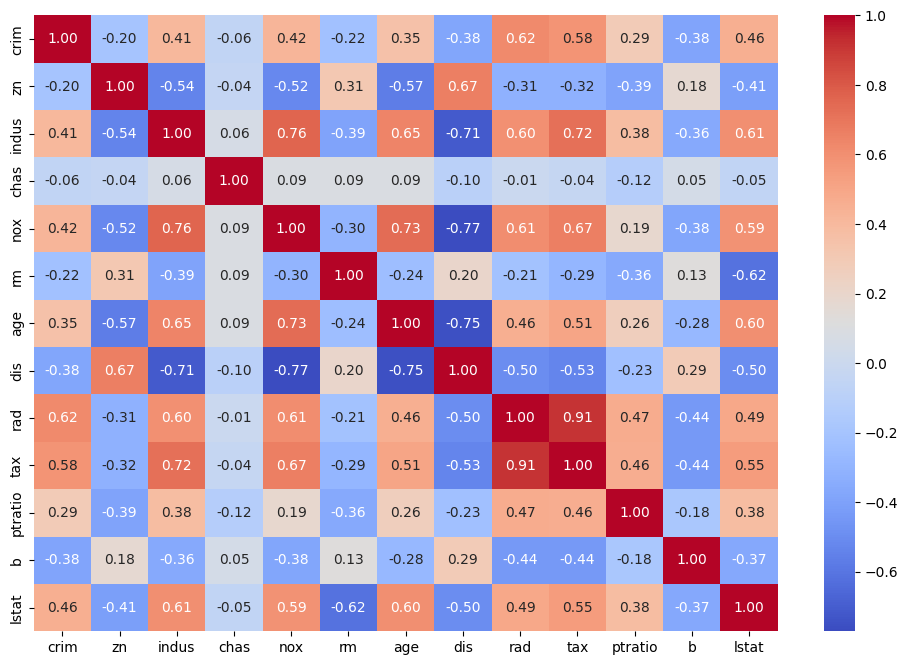

In [57]:
## Checking for collinearity
# Correlation Matrix
corr_matrix = pd.DataFrame(x).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


### Regression With Normalizing the Data

In [ ]:
# Setting Features (x) and Target (y)
x=copy_data.drop(columns=['Price'])
y=copy_data['Price']
x.head()

# Normalizing the Data
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Converting back to DataFrame for compatibility with pandas methods
x = pd.DataFrame(x, columns=copy_data.drop(columns=['Price']).columns)
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.421957,0.282068,-1.292009,-0.274057,-0.147765,0.412351,-0.117562,0.144476,-0.985106,-0.670074,-1.457141,0.443342,-1.071016
1,-0.419525,-0.487464,-0.597147,-0.274057,-0.742232,0.193874,0.368529,0.561899,-0.870516,-0.989880,-0.301961,0.443342,-0.489652
2,-0.419527,-0.487464,-0.597147,-0.274057,-0.742232,1.277743,-0.263034,0.561899,-0.870516,-0.989880,-0.301961,0.398900,-1.203779
3,-0.418938,-0.487464,-1.310986,-0.274057,-0.837002,1.012451,-0.805895,1.083071,-0.755926,-1.108327,0.113904,0.418555,-1.356107
4,-0.414687,-0.487464,-1.310986,-0.274057,-0.837002,1.223834,-0.507854,1.083071,-0.755926,-1.108327,0.113904,0.443342,-1.022103


R2 Score:  0.7200277678580311
Model Score:  0.7200277678580311
Mean Squared Error:  20.687720473048522
Mean Absolute Error:  3.242856914810705


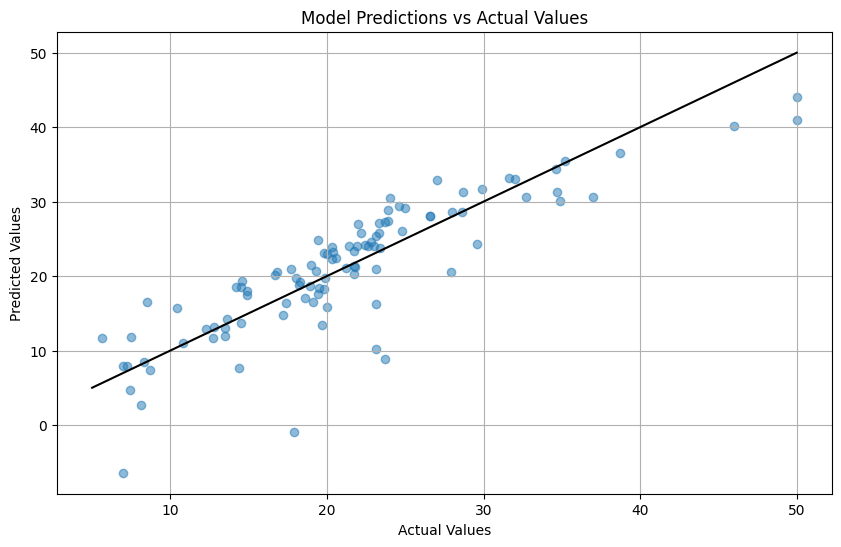

In [ ]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
 
 # Linear Regression Model
model=LinearRegression()
model.fit(x_train,y_train)
# Prediction
y_pred=model.predict(x_test)
# Model Evaluation
r2=r2_score(y_test,y_pred)
model_score=model.score(x_test,y_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
# Printing the Results
print("R2 Score: ",r2)
print("Model Score: ",model_score)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)

# Plotting the model predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()],color='black')
plt.grid(True)
plt.show()




# Polynomial Regression

R2 Score:  0.8313897183147436
Model Score:  0.8313897183147436
Mean Squared Error:  12.45895833918905
Mean Absolute Error:  2.478978402400151


C:\Users\caaka\AppData\Local\Temp\ipykernel_33568\2743808319.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


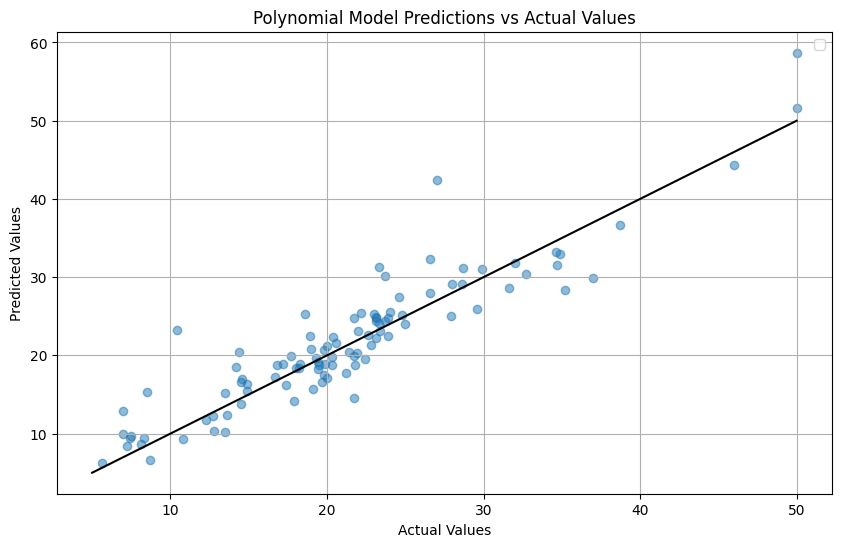

In [61]:
# Polynomial Regression

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
model_score = model.score(x_test_poly, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the Results
print("R2 Score: ", r2)
print("Model Score: ", model_score)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

# Plotting the model predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Polynomial Model Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black')
plt.grid(True)
plt.legend()
plt.show()


# Ridge with Linear Regression

In [87]:
# Ridge regression
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

# Evaluate
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("R2 Score (Ridge): ", r2_ridge)
print("Mean Squared Error (Ridge): ", mse_ridge)
print("Mean Absolute Error (Ridge): ", mae_ridge)

R2 Score (Ridge):  0.7204974329602571
Mean Squared Error (Ridge):  20.65301595868842
Mean Absolute Error (Ridge):  3.241074856276148


# Random Forest Regressor

In [91]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("R2 Score (Random Forest): ", r2_score(y_test, y_pred_rf))

R2 Score (Random Forest):  0.8783274186752894


# Ridge with Polynomial Regression

In [82]:
# Ridge Regression with Polynomial Features
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
ridge_model_poly = Ridge(alpha=1)
ridge_model_poly.fit(x_train_poly, y_train)
y_pred_ridge_poly = ridge_model_poly.predict(x_test_poly)

# Evaluate
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
mse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly)
mae_ridge_poly = mean_absolute_error(y_test, y_pred_ridge_poly)
print("R2 Score (Ridge with Polynomial Features): ", r2_ridge_poly)
print("Mean Squared Error (Ridge with Polynomial Features): ", mse_ridge_poly)
print("Mean Absolute Error (Ridge with Polynomial Features): ", mae_ridge_poly)

R2 Score (Ridge with Polynomial Features):  0.8448442263216114
Mean Squared Error (Ridge with Polynomial Features):  11.46477724266041
Mean Absolute Error (Ridge with Polynomial Features):  2.3655273993129784


In [86]:
# Finding Optimal Alpha for Ridge Regression

# parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_poly, y_train)

# Best model
best_ridge = grid_search.best_estimator_
y_pred_best = best_ridge.predict(x_test_poly)
print("Best Alpha: ", grid_search.best_params_)
print("R2 Score (Tuned Ridge): ", r2_score(y_test, y_pred_best))

Best Alpha:  {'alpha': 1.0}
R2 Score (Tuned Ridge):  0.8448442263216114


# Conclusion

### Based on various Regressions performed on the Boston Housing dataset, we can conclude that:
- The Random Forest Regressor performed the best with a R2 Score of 0.88.
- The Ridge with Polynomial Regression performed the second best with a R2 Score of 0.84.
- The Ridge with Linear Regression performed the third best with a R2 Score of 0.72.
- The Random Forest Regressor is the best model for predicting the Boston Housing dataset.
- The Ridge with Polynomial Regression is the second best model for predicting the Boston Housing dataset.
- The Ridge with Linear Regression is the third best model for predicting the Boston Housing dataset.
- The Polynomial Regression is the fourth best model for predicting the Boston Housing dataset.